In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fancy histogram plot function for given column
def plot_histogram(df, column_name, bins=10):
    data = df[column_name].dropna()
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [2]:
data_info_dir = "/mnt/l/Basic/divi/jstoker/slicer_pdac/Marius/Reza Morphology/data/preprocessed_data/CRLM/dataset_CAESAR_dec23_MASTER.xlsx"
raw_data_df = pd.read_excel(data_info_dir)


In [3]:
raw_data_df.head()

,SubjectKey,Segmented,Notes,Arm,Age,sex,#SCANS,Baseline scan date,Baseline sum diameter,Baseline volume ml,...,treatment,nrcyclesirxpreop,nrcyclesirxpostop,induction,adjyn,Primary tumor resected by baseline 0=no 1=yes,Date of primary tumor resection before registration,Date of primary tumor resection after registration,Unnamed: 96,Unnamed: 97
0,1,Yes,NaN,C,56,Female,2.0,2014-11-03,139.0,302.358623,...,FOLFOX-B,12,0,12,NaN,1,2014-10-03 00:00:00,NaT,NaN,NaN
1,2,No,Missing scans,D,65,Male,NaN,NaT,NaN,NaN,...,FOLFOX-P,3,0,3,No,0,NaN,2015-03-31,NaN,10.0
2,3,No,Missing scans,A,55,Male,NaN,NaT,NaN,NaN,...,FOLFOX-B,5,0,5,No,1,2014-12-07 00:00:00,2014-12-07,NaN,NaN
3,4,Yes,NaN,D,35,Female,2.0,2014-12-18,140.0,1471.160595,...,FOLFOX-P,12,0,12,NaN,0,NaN,NaT,NaN,14.0
4,5,No,MRI evaluation,C,57,Female,NaN,NaT,NaN,NaN,...,FOLFIRI-B,6,0,6,No,1,2014-10-31 00:00:00,NaT,NaN,NaN


In [4]:
filtered_by_segmentation = raw_data_df[raw_data_df['Segmented'] == 'Yes']

print(f"Total cases: {len(filtered_by_segmentation)}")


Total cases: 418


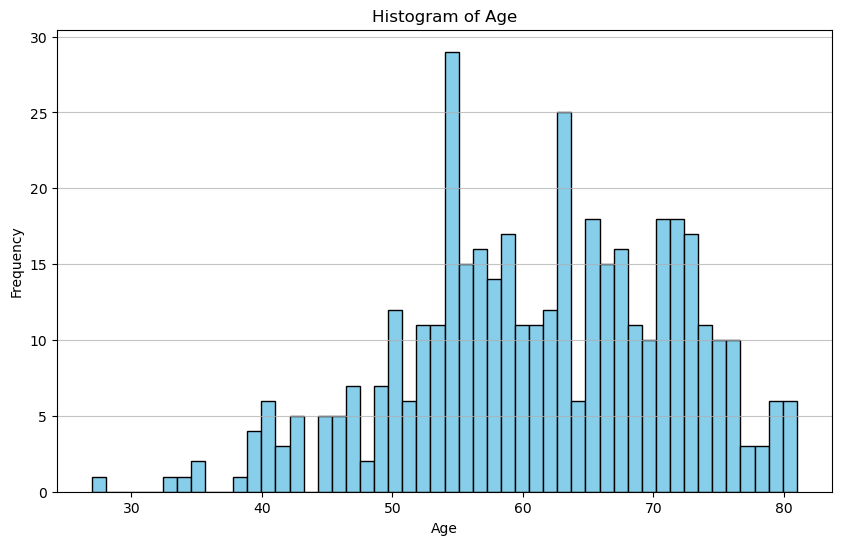

In [5]:
plot_histogram(filtered_by_segmentation, 'Age', bins=50)


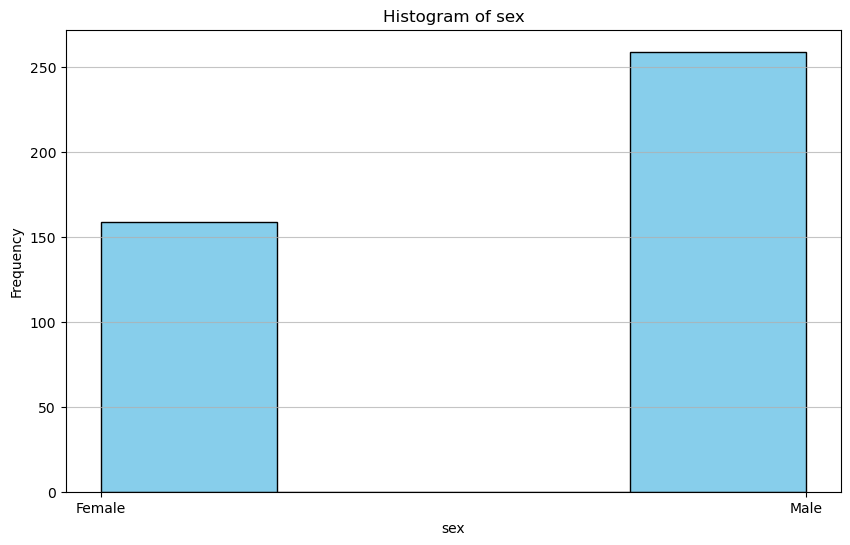

['Female' 'Male']


In [6]:
plot_histogram(filtered_by_segmentation, 'sex', bins=4)
print(filtered_by_segmentation['sex'].unique())


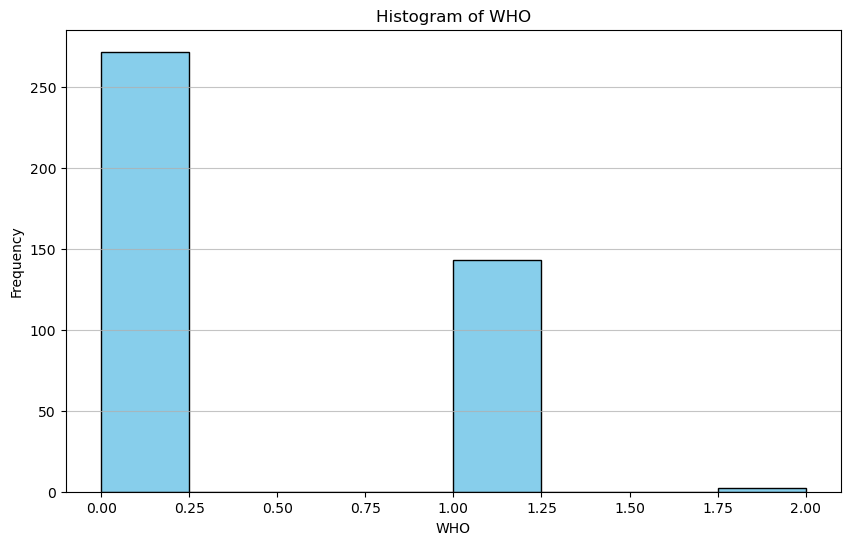

[ 1.  0.  2. nan]


In [7]:
plot_histogram(filtered_by_segmentation, 'WHO', bins=8)
print(filtered_by_segmentation['WHO'].unique())

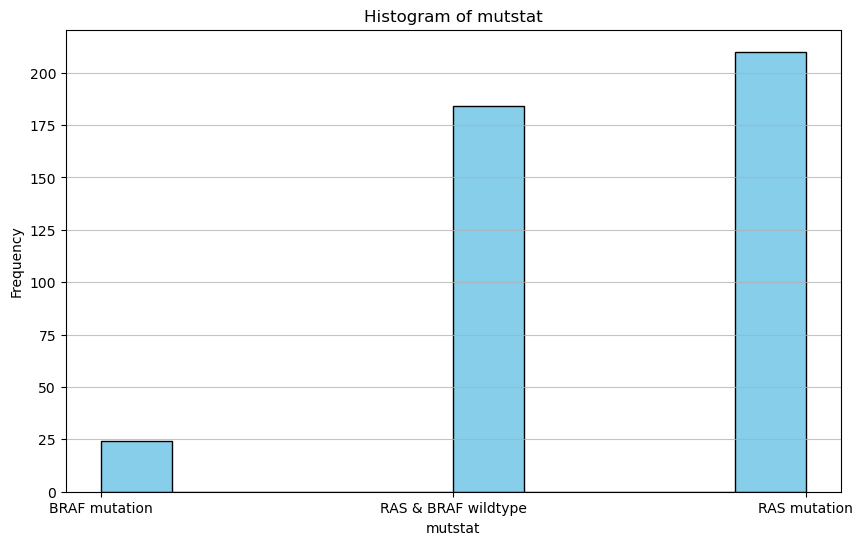

['BRAF mutation' 'RAS & BRAF wildtype' 'RAS mutation']


In [8]:
plot_histogram(filtered_by_segmentation, 'mutstat', bins=10)
print(filtered_by_segmentation['mutstat'].unique())

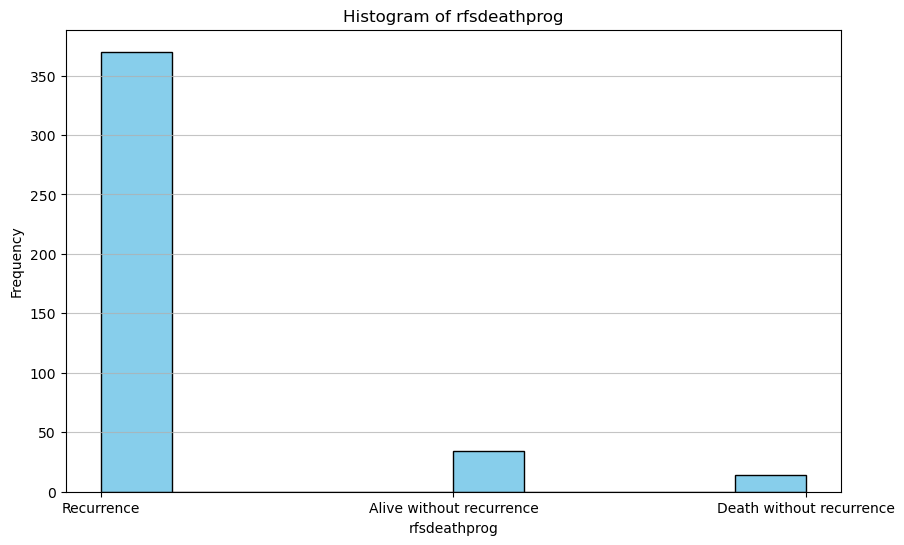

rfsdeathprog
Recurrence                  370
Alive without recurrence     34
Death without recurrence     14
Name: count, dtype: int64

In [9]:
# recurrence plots
plot_histogram(filtered_by_segmentation, 'rfsdeathprog', bins=10)
filtered_by_segmentation['rfsdeathprog'].value_counts()

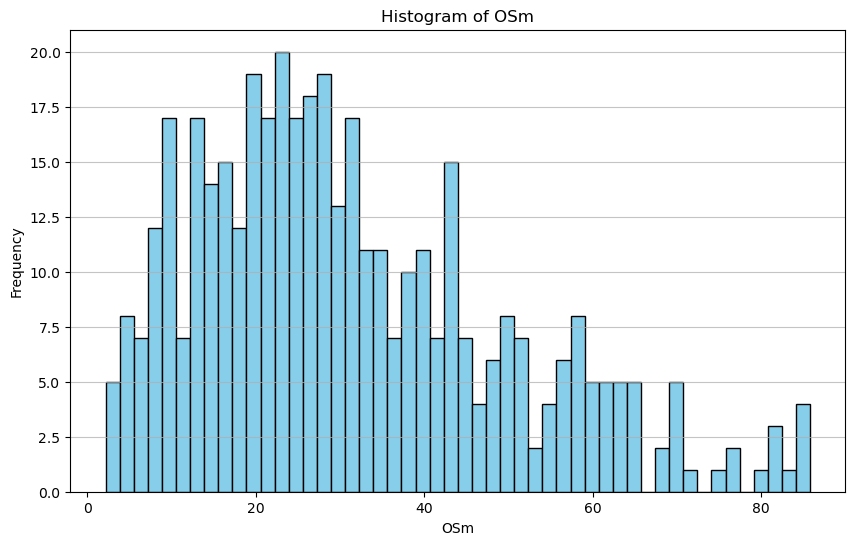

Overall Survival (months) - Mean: 31.3232661642907, Median: 27.498973305954824


In [10]:
plot_histogram(filtered_by_segmentation, 'OSm', bins=50)
# print some statistics
print(f"Overall Survival (months) - Mean: {filtered_by_segmentation['OSm'].mean()}, Median: {filtered_by_segmentation['OSm'].median()}")

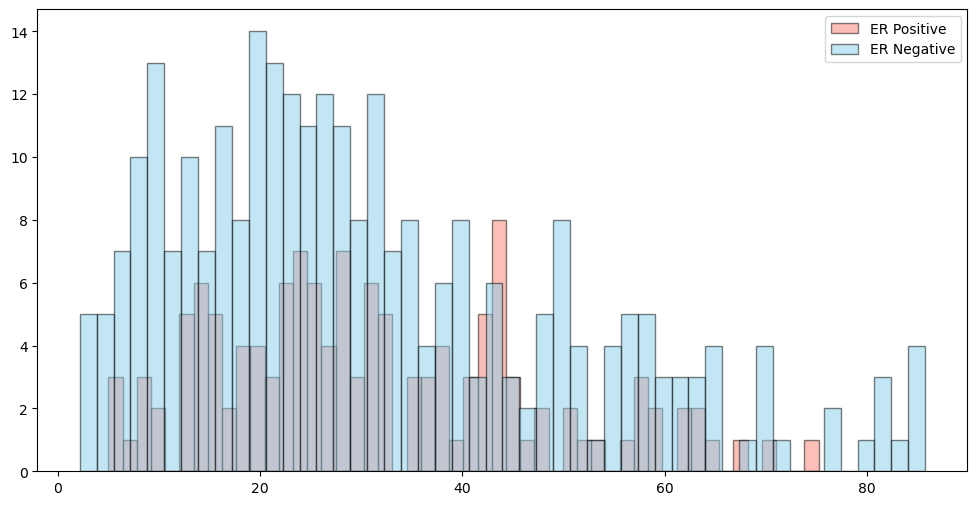

In [16]:
# show two histograms on top for OSm and labels ER column (0-1) with different colors
ER_positive_osm = filtered_by_segmentation[filtered_by_segmentation['ER (1 = yes, 0 = no)'] == 1]['OSm']
ER_negative_osm = filtered_by_segmentation[filtered_by_segmentation['ER (1 = yes, 0 = no)'] == 0]['OSm']
plt.figure(figsize=(12, 6))
plt.hist(ER_positive_osm, bins=50, color='salmon', edgecolor='black', alpha=0.5, label='ER Positive')
plt.hist(ER_negative_osm, bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='ER Negative')
plt.legend()
plt.show()

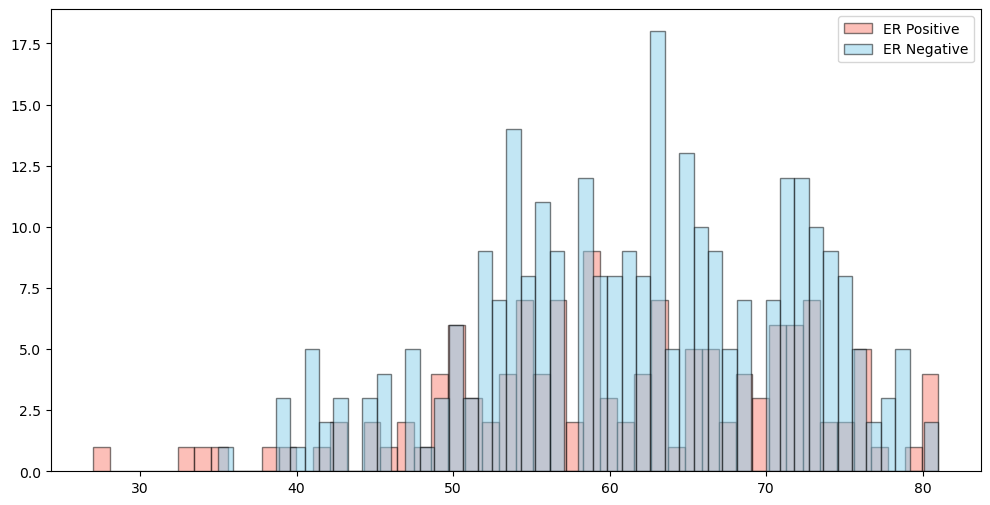

In [17]:
# show two histograms on top for OSm and labels ER column (0-1) with different colors
ER_positive_age = filtered_by_segmentation[filtered_by_segmentation['ER (1 = yes, 0 = no)'] == 1]['Age']
ER_negative_age = filtered_by_segmentation[filtered_by_segmentation['ER (1 = yes, 0 = no)'] == 0]['Age']
plt.figure(figsize=(12, 6))
plt.hist(ER_positive_age, bins=50, color='salmon', edgecolor='black', alpha=0.5, label='ER Positive')
plt.hist(ER_negative_age, bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='ER Negative')
plt.legend()
plt.show()

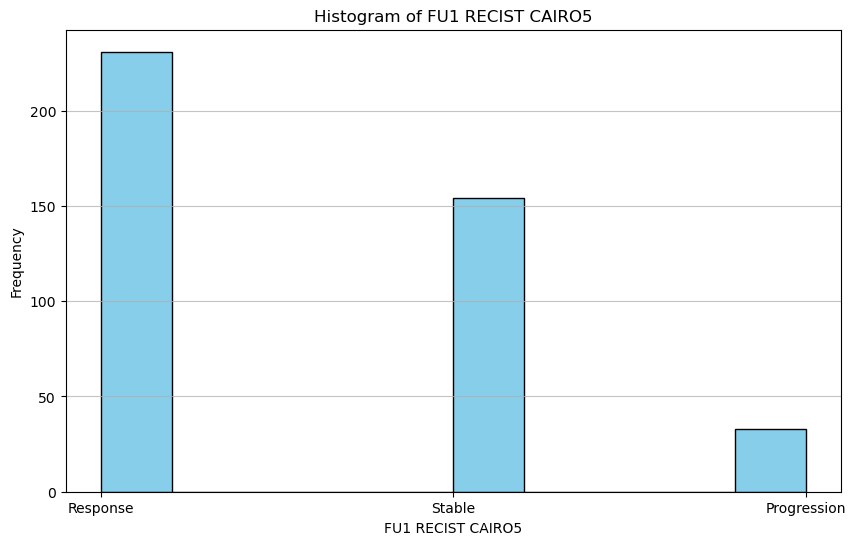

In [12]:
plot_histogram(filtered_by_segmentation, 'FU1 RECIST CAIRO5', bins=10)

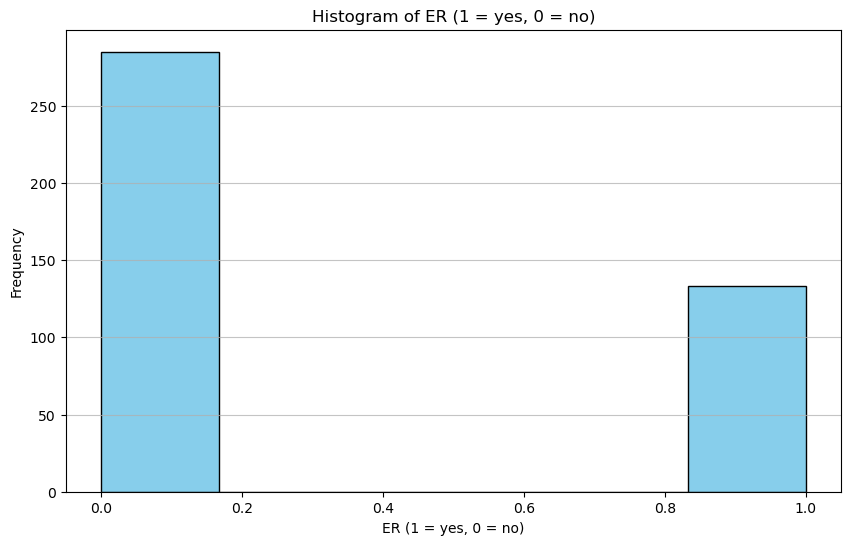

[0. 1.]
ER (1 = yes, 0 = no)
0.0    285
1.0    133
Name: count, dtype: int64


In [13]:
plot_histogram(filtered_by_segmentation, 'ER (1 = yes, 0 = no)', bins=6)
print(filtered_by_segmentation['ER (1 = yes, 0 = no)'].unique())
print(filtered_by_segmentation['ER (1 = yes, 0 = no)'].value_counts())

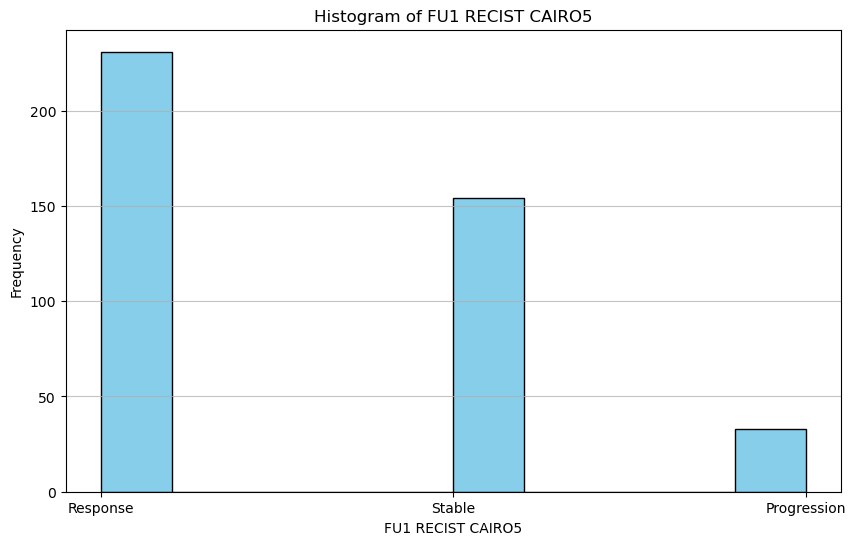

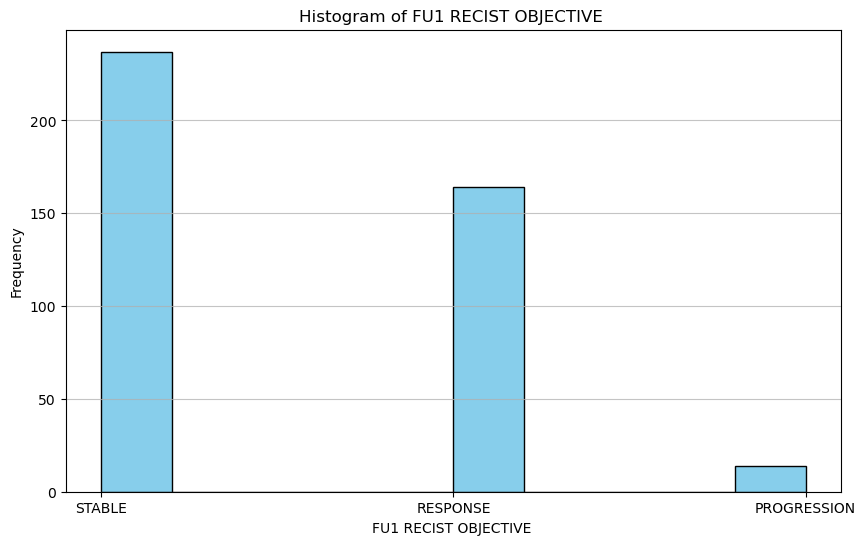

In [20]:
plot_histogram(filtered_by_segmentation, 'FU1 RECIST CAIRO5', bins=10)
plot_histogram(filtered_by_segmentation, 'FU1 RECIST OBJECTIVE ', bins=10)